In [25]:
#from google.colab import drive
#drive.mount('/content/drive')

In [26]:
# %cd /content/drive/MyDrive/Github/brianhelenfakenews/

Train: ISOT + ReCOVery + FA-KES

Test: ISOT, ReCOVery, FA-KES (individually)

In [27]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, LSTM, Embedding, Input, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import multilabel_confusion_matrix
from numpy import unique
from tensorflow.keras import layers
from tensorflow.math import confusion_matrix

In [28]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13850085525813187546
, name: "/device:DML:0"
device_type: "DML"
memory_limit: 7355426407
locality {
}
incarnation: 7566940725647049572
physical_device_desc: "{\"name\": \"AMD Radeon RX 5700 XT\", \"vendor_id\": 4098, \"device_id\": 29471, \"driver_version\": \"30.0.13023.1012\"}"
]


In [29]:
true = pd.read_csv("../Datasets/ISOT/True.csv", dtype=str)
fake = pd.read_csv ("../Datasets/ISOT/Fake.csv", dtype=str)
true.head()
fake.head()

,title,text,subject,date,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
true = true.loc[:, ~true.columns.str.contains('^Unnamed')]
fake = fake.loc[:, ~fake.columns.str.contains('^Unnamed')]
fake = fake.drop(columns=fake.columns[0])
fake = fake.drop(columns=fake.columns[1])
fake = fake.drop(columns=fake.columns[1])
true = true.drop(columns=true.columns[0])
true = true.drop(columns=true.columns[1])
true = true.drop(columns=true.columns[1])

In [31]:
true = shuffle(true, random_state=0)
fake = shuffle(fake, random_state=0)

In [32]:
truetrainpercentage = round(len(true)*0.8)
truetotal = len(true)
faketrainpercentage = round(len(fake)*0.8)
faketotal = len(fake)

In [33]:
truetrain = true[0:truetrainpercentage]
truetest = true[truetrainpercentage:truetotal]
faketrain = fake[0:faketrainpercentage]
faketest = fake[faketrainpercentage:faketotal]

In [34]:
fa_kes = pd.read_csv("../Datasets/FA-KESDataset/FA-KES-Dataset.csv")
recovery = pd.read_csv("../Datasets/ReCOVery/recovery-news-data.csv")

In [35]:
fa_kes = fa_kes.drop(columns=fa_kes.columns[0])
fa_kes = fa_kes.drop(columns=fa_kes.columns[0])
fa_kes = fa_kes.drop(columns=fa_kes.columns[1])
fa_kes = fa_kes.drop(columns=fa_kes.columns[1])
fa_kes = fa_kes.drop(columns=fa_kes.columns[1])
fa_kes = fa_kes.drop(columns=fa_kes.columns[2])
fa_kes

,text,label
0,Wed 05 Apr 2017 Syria attack symptoms consiste...,0
1,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,0
2,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,0
3,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,0
4,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,0
...,...,...
799,28-08-2016 Turkish Bombardment Kills 20 Civili...,1
800,17-08-2016 Martyrs as Terrorists Shell Aleppos...,1
801,03-08-2016 Chemical Attack Kills Five Syrians ...,0
802,01-08-2016 5 Killed as Russian Military Choppe...,1


In [36]:
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[0])
recovery = recovery.drop(columns=recovery.columns[1])
recovery = recovery.drop(columns=recovery.columns[1])
recovery

,text,label
0,\nA novel respiratory virus that originated in...,1
1,Chinese Health Officials: More Die From Newly ...,1
2,Public health experts around the globe are scr...,1
3,The first two coronavirus cases in Europe have...,0
4,"A new coronavirus appeared in Wuhan, China, at...",1
...,...,...
2024,© Robert Gauthier/Los Angeles Times/TNS People...,0
2025,"Michael Moore, for decades on the political fr...",0
2026,© HEATHER KHALIFA/The Philadelphia Inquirer/TN...,0
2027,Nearly half of the Twitter accounts sharing in...,0


In [37]:
fa_kes = shuffle(fa_kes, random_state=0)
recovery = shuffle(recovery, random_state=0)

In [38]:
fa_kestrainpercentage = round(len(fa_kes)*0.8)
fa_kestotal = len(fa_kes)
recoverytrainpercentage = round(len(recovery)*0.8)
recoverytotal = len(recovery)

fa_kestrain = fa_kes[0:fa_kestrainpercentage]
fa_kestest = fa_kes[fa_kestrainpercentage:fa_kestotal]
recoverytrain = recovery[0:recoverytrainpercentage]
recoverytest = recovery[recoverytrainpercentage:recoverytotal]

In [39]:
trainframes = [truetrain, faketrain]
train = pd.concat(trainframes)
train = shuffle(train, random_state=0)

In [40]:
isottestframes = [truetest, faketest]
isottest = pd.concat(isottestframes)
isottest = shuffle(isottest, random_state=0)

In [41]:
train

,text,label
18300,The hate for the Trump family by the defeated ...,0
19237,"BERLIN/GREIFSWALD, Germany (Reuters) - German ...",1
156,If Hillary Clinton got into a fistfight with J...,0
21102,Nah nah nah nah hey hey hey good bye Support f...,0
16722,General Boykin spoke at The Awakening 2016 con...,0
...,...,...
8771,Politicians have been known to do a lot of thi...,0
4085,It was just a simple tweet but Stephen King s ...,0
18378,United Airlines should probably consider an ex...,0
8683,If there s one person that you don t want to m...,0


In [42]:
import spacy
spacy.load('en_core_web_sm')

In [43]:
#!pip install spacy== 3.0.0
#!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\bliu0\appdata\local\temp\pip-req-build-jc9e74qs
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7691 sha256=89e86bc159672205df16450b2d0ad54b5ab9ab3de1ab0c512c51ae5b9c519947
  Stored in directory: C:\Users\bliu0\AppData\Local\Temp\pip-ephem-wheel-cache-dst98hqb\wheels\cd\26\af\103cfac199bd773bfc95ed85a52fe9095e4d902ed9ac3b0c97
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\bliu0\AppData\Local\Temp\pip-req-build-jc9e74qs'


In [44]:
import preprocess_kgptalkie as ps

In [45]:
train['text'] = train['text'].apply(lambda x: str(x).lower())
isottest['text'] = isottest['text'].apply(lambda x: str(x).lower())
fa_kestest['text'] = fa_kestest['text'].apply(lambda x: str(x).lower())
recoverytest['text'] = recoverytest['text'].apply(lambda x: str(x).lower())

train['text'] = train['text'].apply(lambda x: ps.remove_special_chars(x))
isottest['text'] = isottest['text'].apply(lambda x: ps.remove_special_chars(x))
fa_kestest['text'] = fa_kestest['text'].apply(lambda x: ps.remove_special_chars(x))
recoverytest['text'] = recoverytest['text'].apply(lambda x: ps.remove_special_chars(x))

C:\Users\bliu0\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bliu0\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\bliu0\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [46]:
train

,text,label
18300,the hate for the trump family by the defeated ...,0
19237,berlingreifswald germany reuters german chance...,1
156,if hillary clinton got into a fistfight with j...,0
21102,nah nah nah nah hey hey hey good bye support f...,0
16722,general boykin spoke at the awakening 2016 con...,0
...,...,...
8771,politicians have been known to do a lot of thi...,0
4085,it was just a simple tweet but stephen king s ...,0
18378,united airlines should probably consider an ex...,0
8683,if there s one person that you don t want to m...,0


In [47]:
trainx = [d.split() for d in train['text'].tolist()]
trainy = train['label'].values

isotx = [d.split() for d in isottest['text'].tolist()]
isoty = isottest['label'].values

fa_kesx = [d.split() for d in fa_kestest['text'].tolist()]
fa_kesy = fa_kestest['label'].values

recoveryx = [d.split() for d in recoverytest['text'].tolist()]
recoveryy = recoverytest['label'].values

In [48]:
DIM = 500
trainw2v_model = gensim.models.Word2Vec(sentences=trainx, vector_size=DIM, window=10, min_count=1)

isotw2v_model = gensim.models.Word2Vec(sentences=isotx, vector_size=DIM, window=10, min_count=1)

fa_kesw2v_model = gensim.models.Word2Vec(sentences=fa_kesx, vector_size=DIM, window=10, min_count=1)

recoveryw2v_model = gensim.models.Word2Vec(sentences=recoveryx, vector_size=DIM, window=10, min_count=1)

# size --> vector_size

In [49]:
len(trainw2v_model.wv.key_to_index)

len(isotw2v_model.wv.key_to_index)

len(fa_kesw2v_model.wv.key_to_index)

len(recoveryw2v_model.wv.key_to_index)

28115

In [50]:
traintokenizer = tf.keras.preprocessing.text.Tokenizer()
traintokenizer.fit_on_texts(trainx)
traintokenizer.fit_on_texts(isotx)
traintokenizer.fit_on_texts(fa_kesx)
traintokenizer.fit_on_texts(recoveryx)

In [51]:
trainx = traintokenizer.texts_to_sequences(trainx)

isotx = traintokenizer.texts_to_sequences(isotx)

fa_kesx = traintokenizer.texts_to_sequences(fa_kesx)

recoveryx = traintokenizer.texts_to_sequences(recoveryx)

train


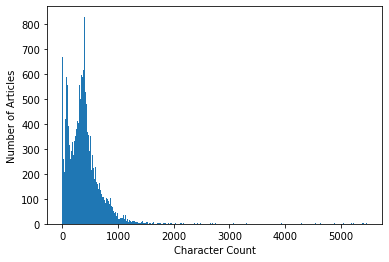

In [52]:
plt.hist([len(a) for a in trainx], bins = 700)
plt.xlabel("Character Count")
plt.ylabel("Number of Articles")
print("train")
plt.show()

isot


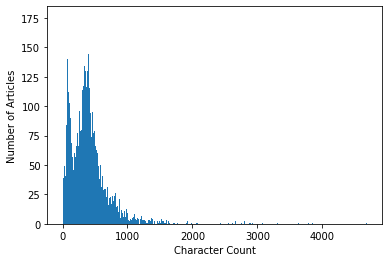

In [53]:
plt.hist([len(a) for a in isotx], bins = 700)
plt.xlabel("Character Count")
plt.ylabel("Number of Articles")
print("isot")
plt.show()

fa_kes


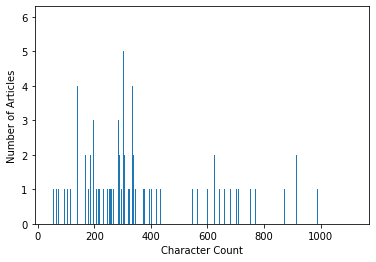

In [54]:
plt.hist([len(a) for a in fa_kesx], bins = 700)
plt.xlabel("Character Count")
plt.ylabel("Number of Articles")
print("fa_kes")
plt.show()

recovery


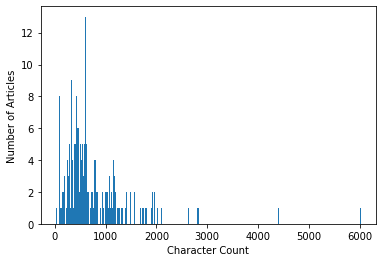

In [55]:
plt.hist([len(a) for a in recoveryx], bins = 700)
plt.xlabel("Character Count")
plt.ylabel("Number of Articles")
print("recovery")
plt.show()

In [56]:
trainnos = np.array([len(a) for a in trainx])
len(trainnos[trainnos>1000])

isotnos = np.array([len(a) for a in isotx])
len(isotnos[isotnos>1000])

fa_kesnos = np.array([len(a) for a in fa_kesx])
len(fa_kesnos[fa_kesnos>1000])

recoverynos = np.array([len(a) for a in recoveryx])
len(recoverynos[recoverynos>1000])

100

In [57]:
maxlen = 100
trainx = tf.keras.preprocessing.sequence.pad_sequences(trainx, maxlen=maxlen)

isotx = tf.keras.preprocessing.sequence.pad_sequences(isotx, maxlen=maxlen)

fa_kesx = tf.keras.preprocessing.sequence.pad_sequences(fa_kesx, maxlen=maxlen)

recoveryx = tf.keras.preprocessing.sequence.pad_sequences(recoveryx, maxlen=maxlen)

In [58]:
trainvocab_size = len(traintokenizer.word_index) + 1
trainvocab = traintokenizer.word_index

#isotvocab_size = len(isottokenizer.word_index) + 1
#isotvocab = isottokenizer.word_index

#fa_kesvocab_size = len(fa_kestokenizer.word_index) + 1
#fa_kesvocab = fa_kestokenizer.word_index

#recoveryvocab_size = len(recoverytokenizer.word_index) + 1
#recoveryvocab = recoverytokenizer.word_index

In [59]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((trainvocab_size, DIM))
    
    for word, i in trainvocab.items():
        try:
            weight_matrix[i] = model.wv[word]
        except:
            print("whatever")
        
    return weight_matrix

In [60]:
embedding_vectors = get_weight_matrix(trainw2v_model)

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
whatever
w

In [61]:
embedding_vectors.shape

(238222, 500)

In [62]:
testx = np.concatenate((isotx, recoveryx, fa_kesx))
testy = np.concatenate((isoty, recoveryy, fa_kesy))

testx = shuffle(testx, random_state = 60)
testy = shuffle(testy, random_state = 60)
# try changing ths

In [63]:
trainy = trainy.astype(int)
testy = testy.astype(int)

In [64]:
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.8.1


In [65]:
oversample = RandomOverSampler(sampling_strategy='auto')
trainx, trainy = oversample.fit_resample(trainx, trainy)

In [66]:
model = Sequential()
# add drop layers and simplify neural netowkr (decrease neurons) -- basically look up how to stop overfitting

model.add(Embedding(trainvocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable = False))
model.add(Conv1D(256, 5, activation="relu"))
model.add(MaxPooling1D(pool_size=2, strides=5, padding="valid"))
model.add(Conv1D(128, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=2, strides=3, padding="valid"))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu')) 
model.add(Dropout(0.4))
model.add(Dense(128, activation = 'relu')) 
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
    optimizer = "Adam",               
              metrics = ['accuracy', 'Recall', 'Precision', 'TrueNegatives', 'TruePositives', 'FalsePositives', 'FalseNegatives'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 500)          119111000 
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 256)           640256    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 19, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 128)           98432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling

In [67]:
len(trainx)

37604

In [68]:
trainx = np.array(trainx)
trainy = np.array(trainy)

isotx = np.array(isotx)
isoty = np.array(isoty)

fa_kesx = np.array(fa_kesx)
fa_kesy = np.array(fa_kesy)

recoveryx = np.array(recoveryx)
recoveryy = np.array(recoveryy)

In [69]:
model.fit(trainx, trainy, epochs=5, batch_size=128)
#loss 0.8

Train on 37604 samples
Epoch 1/5
37604/37604 [==============================] - 8s 219us/sample - loss: 0.2116 - acc: 0.9163 - recall: 0.9246 - precision: 0.9095 - true_negatives: 17073.0000 - true_positives: 17385.0000 - false_positives: 1729.0000 - false_negatives: 1417.0000
Epoch 2/5
37604/37604 [==============================] - 7s 197us/sample - loss: 0.1069 - acc: 0.9637 - recall: 0.9685 - precision: 0.9593 - true_negatives: 18029.0000 - true_positives: 18210.0000 - false_positives: 773.0000 - false_negatives: 592.0000
Epoch 3/5
37604/37604 [==============================] - 7s 196us/sample - loss: 0.0646 - acc: 0.9784 - recall: 0.9816 - precision: 0.9753 - true_negatives: 18334.0000 - true_positives: 18456.0000 - false_positives: 468.0000 - false_negatives: 346.0000
Epoch 4/5
37604/37604 [==============================] - 7s 196us/sample - loss: 0.0429 - acc: 0.9859 - recall: 0.9872 - precision: 0.9846 - true_negatives: 18511.0000 - true_positives: 18562.0000 - false_positives: 

In [70]:
model.evaluate(isotx, isoty) # 6 epochs best so far w/ current params.

8983/8983 [==============================] - 2s 234us/sample - loss: 0.1167 - acc: 0.9608 - recall: 0.9407 - precision: 0.9763 - true_negatives: 4602.0000 - true_positives: 4029.0000 - false_positives: 98.0000 - false_negatives: 254.0000


[0.11666368193557725,
 0.9608149,
 0.94069576,
 0.9762539,
 4602.0,
 4029.0,
 98.0,
 254.0]

In [71]:
model.evaluate(recoveryx, recoveryy)

406/406 [==============================] - 0s 233us/sample - loss: 1.5812 - acc: 0.5345 - recall: 0.4489 - precision: 0.7640 - true_negatives: 94.0000 - true_positives: 123.0000 - false_positives: 38.0000 - false_negatives: 151.0000


[1.5812020272456955,
 0.5344828,
 0.4489051,
 0.76397514,
 94.0,
 123.0,
 38.0,
 151.0]

In [72]:
model.evaluate(fa_kesx, fa_kesy)

161/161 [==============================] - 0s 677us/sample - loss: 2.3507 - acc: 0.5590 - recall: 0.9080 - precision: 0.5563 - true_negatives: 11.0000 - true_positives: 79.0000 - false_positives: 63.0000 - false_negatives: 8.0000


[2.35070086955035, 0.5590062, 0.90804595, 0.556338, 11.0, 79.0, 63.0, 8.0]

In [73]:
model.evaluate(testx, testy)

9550/9550 [==============================] - 2s 222us/sample - loss: 0.2166 - acc: 0.9359 - recall: 0.9111 - precision: 0.9551 - true_negatives: 4707.0000 - true_positives: 4231.0000 - false_positives: 199.0000 - false_negatives: 413.0000


[0.2165885585920973,
 0.9359162,
 0.9110681,
 0.955079,
 4707.0,
 4231.0,
 199.0,
 413.0]

In [74]:
testy

array([1, 1, 1, ..., 1, 0, 0])

In [75]:
fake = 0
true = 0

for x in range(len(trainy)):
    if trainy[x] == 0:
        fake += 1
    elif trainy[x] == 1:
        true += 1

fake, true

(18802, 18802)

# URL Classifier

In [76]:
!pip install whois
!pip install pyquery
!pip install tqdm
!pip install interruptingcow
!pip install requests

In [77]:
import requests
from interruptingcow import timeout
import whois
from datetime import datetime, timezone
import math
import pandas as pd
import numpy as np
from pyquery import PyQuery
from requests import get
import tensorflow as tf
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, LSTM, Embedding, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from numpy import unique
from tensorflow.keras import layers
from tensorflow.math import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [78]:
class UrlFeaturizer(object):
    def __init__(self, url):
        self.url = url
        self.domain = url.split('//')[-1].split('/')[0]
        self.today = datetime.now().replace(tzinfo=None)

        try:
            self.whois = whois.query(self.domain).__dict__
        except:
            self.whois = None

        try:
            self.response = get(self.url)
            self.pq = PyQuery(self.response.text)
        except:
            self.response = None
            self.pq = None

    ## URL string Features
    def entropy(self):
        string = self.url.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return entropy

    def ip(self):
        string = self.url
        flag = False
        if ("." in string):
            elements_array = string.strip().split(".")
            if(len(elements_array) == 4):
                for i in elements_array:
                    if (i.isnumeric() and int(i)>=0 and int(i)<=255):
                        flag=True
                    else:
                        flag=False
                        break
        if flag:
            return 1 
        else:
            return 0

    def numDigits(self):
        digits = [i for i in self.url if i.isdigit()]
        return len(digits)

    def urlLength(self):
        return len(self.url)

    def numParameters(self):
        params = self.url.split('&')
        return len(params) - 1

    def numFragments(self):
        fragments = self.url.split('#')
        return len(fragments) - 1

    def numSubDomains(self):
        subdomains = self.url.split('http')[-1].split('//')[-1].split('/')
        return len(subdomains)-1

    def domainExtension(self):
        ext = self.url.split('.')[-1].split('/')[0]
        return ext

    ## URL domain features
    def hasHttp(self):
        return 'http:' in self.url

    def hasHttps(self):
        return 'https:' in self.url

    def daysSinceRegistration(self):
        if self.whois and self.whois['creation_date']:
            diff = self.today - self.whois['creation_date'].replace(tzinfo=None)
            diff = str(diff).split(' days')[0]
            return diff
        else:
            return 0

    def daysSinceExpiration(self):
        if self.whois and self.whois['expiration_date']:
            diff = self.whois['expiration_date'].replace(tzinfo=None) - self.today
            diff = str(diff).split(' days')[0]
            return diff
        else:
            return 0
    
     ## URL Page Features
    def bodyLength(self):
        if self.pq is not None:
            return len(self.pq('html').text()) if self.urlIsLive else 0
        else:
            return 0

    def numTitles(self):
        if self.pq is not None:
            titles = ['h{}'.format(i) for i in range(7)]
            titles = [self.pq(i).items() for i in titles]
            return len([item for s in titles for item in s])
        else:
            return 0

    def numImages(self):
        if self.pq is not None:
            return len([i for i in self.pq('img').items()])
        else:
            return 0

    def numLinks(self):
        if self.pq is not None:
            return len([i for i in self.pq('a').items()])
        else:
            return 0

    def scriptLength(self):
        if self.pq is not None:
            return len(self.pq('script').text())
        else:
            return 0

    def specialCharacters(self):
        if self.pq is not None:
            bodyText = self.pq('html').text()
            schars = [i for i in bodyText if not i.isdigit() and not i.isalpha()]
            return len(schars)
        else:
            return 0

    def scriptToSpecialCharsRatio(self):
        v = self.specialCharacters()
        if self.pq is not None and v!=0:
            sscr = self.scriptLength()/v
        else:
            sscr = 0
        return sscr

    def scriptTobodyRatio(self):
        v = self.bodyLength()
        if self.pq is not None and v!=0:
            sbr = self.scriptLength()/v
        else:
            sbr = 0
        return sbr

    def bodyToSpecialCharRatio(self):
        v = self.bodyLength()
        if self.pq is not None and v!=0:
            bscr = self.specialCharacters()/v
        else:
            bscr = 0
        return bscr

    def urlIsLive(self):
        return self.response == 200

    def run(self):
        data = {}
        data['entropy'] = self.entropy()
        data['numDigits'] = self.numDigits()
        data['urlLength'] = self.urlLength()
        data['numParams'] = self.numParameters()
        data['hasHttp'] = self.hasHttp()
        data['hasHttps'] = self.hasHttps()
        data['urlIsLive'] = self.urlIsLive()
        data['bodyLength'] = self.bodyLength()
        data['numTitles'] = self.numTitles()
        data['numImages'] = self.numImages()
        data['numLinks'] = self.numLinks()
        data['scriptLength'] = self.scriptLength()
        data['specialChars'] = self.specialCharacters()
        data['ext'] = self.domainExtension()
        data['dsr'] = self.daysSinceRegistration()
        data['dse'] = self.daysSinceExpiration()
        data['sscr'] = self.scriptToSpecialCharsRatio()
        data['sbr'] = self.scriptTobodyRatio()
        data['bscr'] = self.bodyToSpecialCharRatio()
        data['num_%20'] = self.url.count("%20")
        data['num_@'] = self.url.count("@")
        data['has_ip'] = self.ip()
    
        return data

In [79]:
data = pd.read_csv('../Datasets/FA-KESDataset/FA-KES-Dataset.csv')
data.head(5)

,unit_id,article_title,text,source,date,location,label,URL
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0,http://nna-leb.gov.lb/en/show-news/77705/
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0,http://nna-leb.gov.lb/en/show-news/77731/nna-l...
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0,http://nna-leb.gov.lb/en/show-news/29474/nna-l...
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0,http://nna-leb.gov.lb/en/show-news/78274/nna-l...
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0,http://nna-leb.gov.lb/en/show-news/65189/nna-l...


In [80]:
data

,unit_id,article_title,text,source,date,location,label,URL
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0,http://nna-leb.gov.lb/en/show-news/77705/
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0,http://nna-leb.gov.lb/en/show-news/77731/nna-l...
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0,http://nna-leb.gov.lb/en/show-news/29474/nna-l...
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0,http://nna-leb.gov.lb/en/show-news/78274/nna-l...
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0,http://nna-leb.gov.lb/en/show-news/65189/nna-l...
...,...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1,http://archive.almanar.com.lb/english/article....
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1,http://archive.almanar.com.lb/english/article....
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0,http://archive.almanar.com.lb/english/article....
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1,http://archive.almanar.com.lb/english/article....


In [82]:
data = data[['label', 'URL']]

data.head(5)

,label,URL
0,0,http://nna-leb.gov.lb/en/show-news/77705/
1,0,http://nna-leb.gov.lb/en/show-news/77731/nna-l...
2,0,http://nna-leb.gov.lb/en/show-news/29474/nna-l...
3,0,http://nna-leb.gov.lb/en/show-news/78274/nna-l...
4,0,http://nna-leb.gov.lb/en/show-news/65189/nna-l...


In [83]:
data['label'].value_counts()
data['label'] = data['label'].astype(float)

C:\Users\bliu0\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


data = data.drop(397)
data = data.drop(1635)

In [ ]:
features_list = []
for idx, row in data.iterrows():
  print(idx)
  url_string = row['URL']
  rating = row['label']
  features = UrlFeaturizer(url_string).run()
  features['label'] = rating
  features_list.append(features)

df = pd.DataFrame(features_list)

0
Unknown TLD: .lb
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 1
Unknown TLD: .lb
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale

28
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
29
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
30
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
31
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
32
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
33
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
34
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\bria

84
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
85
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
86
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
87
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
88
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
89
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
90
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\bria

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 137
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 151
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 165
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 179
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 193
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 207
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 221
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 235
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 249
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 263
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 277
Unknown TLD: .eg
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

309
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
310
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
311
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
312
Unknown TLD: .lb
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .wo

356
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
357
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
358
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
359
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
360
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
361
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
362
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitH

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 408
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
409
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
410
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
411
Unkno

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 424
Unknown TLD: .sy
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 441
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
442
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
443
Unknown TLD: .lb
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .c

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 465
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
466
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
467
Unknown TLD: .sy
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .c

492
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
493
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
494
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
495
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
496
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
497
Unknown TLD: .sy
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .i

528
Unknown TLD: .sy
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 529
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
530
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
531
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\te

564
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
565
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
566
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
567
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
568
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
569
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
570
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitH

620
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
621
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
622
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
623
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
624
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
625
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
626
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitH

676
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
677
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
678
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
679
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
680
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
681
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitHub\brianhelenfakenews\testing_stuff
682
downloading dependencies
copy \\live.sysinternals.com\tools\whois.exe C:\Users\bliu0\OneDrive\Documents\GitH

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 712
Unknown TLD: .lb
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 726
Unknown TLD: .lb
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .sh .site .space .store .tech .tel .theatre .tickets .trade .tv .ua .uk .us .uz .video .website .wiki .work .xyz .za 740
Unknown TLD: .lb
Valid TLDs: .ac_uk .am .amsterdam .ar .at .au .bank .be .biz .br .by .ca .cc .cl .club .cn .co .co_il .co_jp .com .com_au .com_tr .cr .cz .de .download .edu .education .eu .fi .fm .fr .frl .game .global_ .hk .id_ .ie .im .in_ .info .ink .io .ir .is_ .it .jp .kr .kz .link .lt .lv .me .mobi .mu .mx .name .net .ninja .nl .nu .nyc .nz .online .org .pe .pharmacy .pl .press .pro .pt .pub .pw .rest .ru .ru_rf .rw .sale .se .security .s

In [ ]:
df

In [ ]:
df.replace(True,1,inplace = True)    
df.replace(False,0,inplace = True)

df.ext = pd.Categorical(df.ext).codes
print(df.ext.head(5))

y = df['label'] 
encoder = LabelEncoder()    
encoder.fit(y)    
Y = encoder.transform(y)  
scaler = MinMaxScaler(feature_range=(0, 1))    

df = df.drop(columns = ['label'])

X = pd.DataFrame(scaler.fit_transform(df))

In [ ]:
X

In [ ]:
len(Y)

In [ ]:
URLX_train, URLX_test, URLy_train, URLy_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.layers import InputLayer

model2 = Sequential()    
model2.add(InputLayer(22))
model2.add(Dense(256, input_dim = 22 , activation = 'relu'))    
model2.add(Dense(128, activation = 'relu'))    
model2.add(Dense(64, activation = 'relu'))    
model2.add(Dense(32, activation = 'relu'))    
model2.add(Dense(16, activation = 'relu'))    
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy' ,optimizer='adam' , metrics = ['accuracy', 'Recall', 'Precision', 'TrueNegatives', 'TruePositives', 'FalsePositives', 'FalseNegatives'] )

model2.summary()

In [ ]:
model2.fit(URLX_train, URLy_train, epochs = 100) 

In [ ]:
model2.evaluate(URLX_test, URLy_test)

# Inputting 1 Data

In [ ]:
articleText = "The Centers for Disease Control and Prevention on Thursday night published new data on the risks of hospitalization and death from Covid-19 among people who are unvaccinated and vaccinated, with or without booster doses. The agency recommends booster shots for Americans 12 and older. These are the first comprehensive data on the effectiveness of boosters by age in the United States. The figures confirm that booster doses are most beneficial to older adults, as the C.D.C. has previously reported. But the new numbers for younger Americans were less compelling. In those age groups, vaccination itself — two doses of the Moderna or Pfizer-BioNTech vaccines, or one dose of the Johnson & Johnson vaccine — decreased the risk of hospitalization and death so sharply that a booster shot did not seem to add much benefit. The data run only through the end of December, when the Omicron surge had just begun. Because the variant is so highly contagious, booster shots may have helped limit the variant’s spread through the population, an argument for boosters that would not be fully captured in the new research. Still, several recent studies have found that vaccination alone, without boosters, remained strongly protective against severe illness and death in most people, even after Omicron’s appearance. “I do not think these data support a universal booster rollout for everyone,” said Dr. Celine Gounder, an infectious disease expert and epidemiologist at Kaiser Health News. Instead, boosters seem most essential for older adults, she said, and those who have certain immune conditions or live in long-term care facilities. In younger Americans, it may have made sense to make booster shots available only to those with certain medical risks, she said. The advantages of booster shots in various age groups were hotly debated last fall, when the Delta variant was the primary form of the virus in the United States. But many scientists came to favor additional doses after the arrival of the highly contagious Omicron variant. “The effect of the booster can be seen in the data sets, but it’s far smaller than the effect of vaccination compared to not,” said John Moore, a virologist at Weill Cornell Medicine in New York. “The real problem is the carnage among the unvaccinated.” Unvaccinated people in every age group are at higher risk of infection, hospitalization and death than those who have been immunized, according to the C.D.C.’s data — a persistent trend ever since vaccines were introduced. As of Dec. 25, the rate of hospitalization among unvaccinated adults older than age 65 was 246 per 100,000 people. That rate dropped to 27.4 per 100,000 among people who were vaccinated without a booster dose, and to 4.9 among those who were vaccinated and received a booster. There were roughly 44 deaths per 100,000 unvaccinated adults 65 and older. Vaccinations dropped that number to about 3.6 deaths per 100,000, one-twelfth as much. Booster shots reduced the rate further, to about 0.5 deaths per 100,000, a figure 90 times as small. But such risk comparisons were less useful in younger people, for whom the rate of severe outcomes was already low. Among adults 50 to 64, 73 unvaccinated adults per 100,000 were hospitalized, compared with nine per 100,000 among those who were vaccinated and just two per 100,000 among those who had also received a booster shot. Boosters made less of a difference in the number of Covid deaths in this age group. Vaccinations decreased the rate to 0.4 deaths per 100,000 from 8.26 per 100,000. With boosters, that number fell to 0.1 deaths per 100,000 people. “This is the difference between a relative risk reduction and an absolute risk reduction,” Dr. Gounder said. “If you’re starting off with a relatively low risk, and you further reduce that risk, in the big picture that may not be such a big impact.” The agency did not provide hospitalization numbers for adults 18 through 49, perhaps because the numbers were too small. Dr. Gounder added that such data “would be really helpful in guiding decisions about boosters.” The C.D.C. also did not release data for children age 12 and older, possibly because boosters have not been recommended for long enough in that age group to have generated meaningful numbers. The risk of Covid death among Americans ages 18 to 49 was low. The rate was about 0.9 per 100,000 people among the unvaccinated, and plummeted to 0.03 among people who were vaccinated. With the addition of a booster, deaths were too low to measure. “I’m in favor of boosters, but I don’t want to overstate their importance,” said Dr. Dan Barouch, a virologist at Beth Israel Deaconess Medical Center in Boston. “The benefit of a booster dose is clearly greater in the elderly,” he added. It “is progressively less in the lower risk groups.” One argument for a universal booster recommendation was to limit the number of infections among all groups and reduce the spread of the virus. The Omicron variant was able to sidestep immune defenses and infect many more people than previous variants, including many who were vaccinated. Booster doses cut the risk of infection in vaccinated people by about half across all age groups. The gap between unvaccinated and vaccinated groups was much greater. The numbers most likely reflect only symptomatic cases, and may be different for asymptomatic infections, Dr. Barouch noted. The figures may also vary with time: Boosters were administered fairly recently, and early data from Britain suggest that their effect may wane in a few months, he added. Some people have worried about persistent symptoms even after a mild bout of Covid. But a recent study suggested that the risk of so-called long Covid is highest among people with one of four predisposing factors, including Type 2 diabetes and the presence of autoantibodies. If the C.D.C. had taken a more targeted approach to booster recommendations, younger adults who have one of those risk factors and were concerned about long Covid could still have chosen to receive a booster, Dr. Gounder said. Still, the new data may not make any difference — to the C.D.C.’s recommendations on boosters, or to the general public. “The booster policy is the booster policy. It’s not going to change,” Dr. Moore said."
url2 = "https://www.nytimes.com/2022/02/04/health/covid-boosters-older-younger.html"
url = "https://www.nytimes.com/article/what-is-coronavirus.html"

In [ ]:
one_data_features_list = []
features = UrlFeaturizer(url).run()
one_data_features_list.append(features)

arb_df = pd.DataFrame(one_data_features_list)

In [ ]:
arb_df

In [ ]:
arb_df.replace(True,1,inplace = True)    
arb_df.replace(False,0,inplace = True)

arb_df.ext = pd.Categorical(arb_df.ext).codes
print(arb_df.ext.head(5))

arb_x = pd.DataFrame(scaler.fit_transform(arb_df))

In [ ]:
arb_x

In [ ]:
df

In [ ]:
arb_x

In [ ]:
model2.predict(arb_x)